## Homeworok 4 solution

Christopher Benson; 
March 5th, 2018


In [1]:
# import some modules we will be needing
from random import uniform
from math import sqrt
from time import time
from numpy import logspace

## Series Solution

Below is the series approach with no parallelization

In [2]:
# create log spaced np array for the number of darts we will be throwing per trial.
dartVector = logspace(1,7,7)

In [12]:
timeResults = []
simulationRate = []

# create a regular for loop 
for numDarts in dartVector:
	start_time = time()
	numDartsInCircle = 0
    # begin throwning numDarts, one at a time
	for n in range(int(numDarts)):
		x,y = uniform(0,1), uniform(0,1)
		if sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
			numDartsInCircle += 1
	end_time = time()
	executionTime = end_time - start_time

	piApprox = 4*float(numDartsInCircle)/float(numDarts)
	timeResults.append(executionTime)
	simulationRate.append(numDarts/float(executionTime))

	print("\nPi Approx: "+str(piApprox))
	print("numDarts: "+str(numDarts))
	print("execution Time [s]: "+str(executionTime))
	print("darts/sec: "+str(numDarts/executionTime))



Pi Approx: 3.2
numDarts: 10.0
execution Time [s]: 2.193450927734375e-05
darts/sec: 455902.608696

Pi Approx: 3.12
numDarts: 100.0
execution Time [s]: 0.0002129077911376953
darts/sec: 469686.898096

Pi Approx: 3.12
numDarts: 1000.0
execution Time [s]: 0.0010879039764404297
darts/sec: 919198.772737

Pi Approx: 3.1376
numDarts: 10000.0
execution Time [s]: 0.014018774032592773
darts/sec: 713329.138251

Pi Approx: 3.13756
numDarts: 100000.0
execution Time [s]: 0.1144869327545166
darts/sec: 873462.128769

Pi Approx: 3.138816
numDarts: 1000000.0
execution Time [s]: 1.032317876815796
darts/sec: 968693.870811

Pi Approx: 3.1414028
numDarts: 10000000.0
execution Time [s]: 10.816574335098267
darts/sec: 924507.12122


## Parallelization using threading

Below is the series approach with multithreading. I choose to consider a solution with 10 threads

In [4]:
import threading
from queue import Queue

In [14]:
q = Queue()

def runDartSim(numDarts):
	numDartsInCircle = 0
	for n in range(int(numDarts)):
		x,y = uniform(0,1), uniform(0,1)
		if sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
			numDartsInCircle += 1

	piApprox = 4*float(numDartsInCircle)/float(numDarts)
	
	if q.empty():
		q.put(numDartsInCircle)
	else:
		var = q.get()
		q.put(var+numDartsInCircle)
		
	return 
	
	
nThreads = 10
timeResultsThread = []
dartsPerSecThread = []
for numDarts in dartVector:
	dartsPerThread = numDarts/nThreads
	q = Queue() # reinit q
	
	start_time = time()
	threads = []
    # distribute 1/10 of darts to each thread and run simulation
	for i in range(nThreads):
		t = threading.Thread(target=runDartSim, args=(dartsPerThread,))
		threads.append(t)
		t.start()
	# wait for all threads to finish
	for t in threads:
		t.join()
	# compute total run time and store in list
	end_time = time()
	executionTime = end_time - start_time
	timeResultsThread.append(executionTime)
	dartsPerSecThread.append(numDarts/executionTime)

	print("\nnumDarts: "+str(numDarts))
	print("execution Time [s]: "+str(executionTime))
	print("darts/sec: "+str(numDarts/executionTime))
    


numDarts: 10.0
execution Time [s]: 0.0018591880798339844
darts/sec: 5378.6919723

numDarts: 100.0
execution Time [s]: 0.0016179084777832031
darts/sec: 61808.1933392

numDarts: 1000.0
execution Time [s]: 0.001886129379272461
darts/sec: 530186.322842

numDarts: 10000.0
execution Time [s]: 0.011441230773925781
darts/sec: 874031.841294

numDarts: 100000.0
execution Time [s]: 0.10472512245178223
darts/sec: 954880.71686

numDarts: 1000000.0
execution Time [s]: 1.0616822242736816
darts/sec: 941901.425056

numDarts: 10000000.0
execution Time [s]: 10.477110147476196
darts/sec: 954461.665406


## Parallelization using `ipyparallel`

Below is the series approach with ipyparallel. 

NEED TO HAVE LOCAL CLUSTER RUNNING!

In [8]:
import ipyparallel as ipp
import os
import math
import random
# Be sure to start local cluster by using 'ipcluster start' on command line

In [19]:
# create the client object for interations with parallelization manager.
rc = ipp.Client()
ar = rc[:].apply_async(os.getpid)

lv = rc.load_balanced_view()

dv = rc[:]

@ipp.require('random','math')
def runDartSim(numDarts):
	numDartsInCircle = 0
	for i in range(int(numDarts)):
		x,y = random.uniform(0,1), random.uniform(0,1)
# 		rad = math.sqrt(x**2 + y**2)
		if math.sqrt(x**2 + y**2)<= 0.5:
			numDartsInCircle += 1
	return numDartsInCircle

timeResultsPar = []
dartsPerSecPar = []
for numDarts in dartVector:	
    start_time = time()
    result = runDartSim(numDarts) # run the parallelized for loop
    end_time = time()
    executionTime = end_time - start_time
    
    timeResultsPar.append(executionTime)
    dartsPerSecPar.append(numDarts/executionTime)
    
    print("\nnumDarts: "+str(numDarts))
    print("execution Time [s]: "+str(executionTime))
    print("darts/sec: "+str(numDarts/executionTime))
    


numDarts: 10.0
execution Time [s]: 2.09808349609375e-05
darts/sec: 476625.454545

numDarts: 100.0
execution Time [s]: 0.00010704994201660156
darts/sec: 934143.429844

numDarts: 1000.0
execution Time [s]: 0.0009441375732421875
darts/sec: 1059167.67677

numDarts: 10000.0
execution Time [s]: 0.010447978973388672
darts/sec: 957122.906303

numDarts: 100000.0
execution Time [s]: 0.10728907585144043
darts/sec: 932061.341813

numDarts: 1000000.0
execution Time [s]: 1.0512080192565918
darts/sec: 951286.502463

numDarts: 10000000.0
execution Time [s]: 10.062742948532104
darts/sec: 993764.826464


## Create final plot

left hand side axis contains total execution time, right hand side axis contains simulation rate.

In [20]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(dartVector,timeResults,label='Simple',color='r') ### series case
ax.plot(dartVector,timeResultsThread,label='Multiprocessing',color='c') ### multithread case
ax.plot(dartVector,timeResultsPar,label='IPcluster',color='g')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Darts Thrown')
ax.set_ylabel('Execution Time (seconds), solid line')

ax2 = ax.twinx()
ax2.plot(dartVector,simulationRate,'r--')
ax2.plot(dartVector,dartsPerSecThread,'c--')
ax2.plot(dartVector,dartsPerSecPar,'g--')
ax2.set_yscale('log')
ax2.set_ylabel('Simulation Rate (darts/second), dashed line')




Text(0,0.5,'Simulation Rate (darts/second), dashed line')

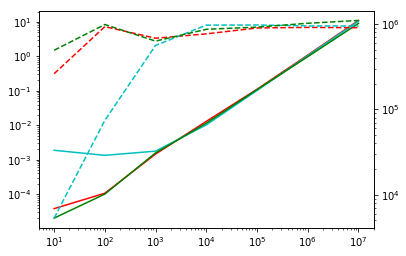

In [11]:
plt.show()